# Pdf to Markdown, get images and chunking

In [1]:
import pymupdf4llm, pymupdf

filename = "414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf"
doc = pymupdf.open(filename)  # use a Document for subsequent processing

page_dicts = pymupdf4llm.to_markdown(
    doc,
    write_images=True,
    page_chunks=True,
    image_path="img_out",
    image_format="png",
    show_progress=True,
)

print(f"Number of pages: {len(page_dicts)}")
print(f"First page content:\n{page_dicts[0]}")  # Print first 500 characters of the first page

Processing 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf...
[                                        ] (0/10[                                        ] (  1/10[                                        ] (  2/106[=                                       ] (  3/106[=                                       ] (  4/1[=                                       ] (  5/10[==                                      ] (  6/10[==                                      ] (  7/106[===                                     ] (  8/106[===                                     ] (  9/1[===                                     ] ( 10/10[====                                    ] ( 11/10[====                                    ] ( 12/10[====                                    ] ( 13/106[=====                                   ] ( 14/1[=====                                   ] ( 15/10[======                                  ] ( 16/10[======                                  ] ( 17/10[======                                  ]

In [2]:
print(f"First page content:\n{len(page_dicts[11]['images'])}")

First page content:
7


In [3]:
print(f"First page content:\n{page_dicts[11]['metadata']['page']}")

First page content:
12


In [4]:
print(f"page image path: {len(page_dicts[11]['images'])}")  # Print the first image path

page image path: 7


In [5]:
for img in page_dicts[11]["images"]:
    img_number = img["number"]
    print(f"Image number: {img_number}")

Image number: 10
Image number: 6
Image number: 14
Image number: 12
Image number: 2
Image number: 4
Image number: 8


In [6]:
print(page_dicts[11]['text'])  # Print first 500 characters of the page content

#### **INFORMATION ABOUT OUR EXECUTIVE OFFICERS**

The executive officers of NIKE, Inc. as of July 20, 2023, are as follows:


_**Mark G. Parker**_, Executive Chairman — Mr. Parker, 67, is Executive Chairman of the Board of Directors
and served as President and Chief Executive Officer from 2006 - January 2020. He has been employed
by NIKE since 1979 with primary responsibilities in product research, design and development,
marketing and brand management. Mr. Parker was appointed divisional Vice President in charge of
product development in 1987, corporate Vice President in 1989, General Manager in 1993, Vice
President of Global Footwear in 1998 and President of the NIKE Brand in 2001.


_**John J. Donahoe II**_, President and Chief Executive Officer — Mr. Donahoe, 63, was appointed
President and Chief Executive Officer in January 2020 and has been a director since 2014. He brings
expertise in digital commerce, technology and global strategy. He previously served as President and
Chief 

In [7]:
print(page_dicts[92]['text'])

The following table includes supplemental information used to calculate the present value of Operating lease liabilities:


**AS OF MAY 31,**

**2023** **2022**


The following table includes supplemental cash and non-cash information related to operating leases:


**YEAR ENDED MAY 31,**


_(Dollars in millions)_ **2023** **2022** **2021**

![](img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-92-1.png)

#### **NOTE 18 — ACQUISITIONS AND DIVESTITURES**

##### **ACQUISITIONS**


During fiscal 2023, 2022 and 2021, the Company made multiple acquisitions focused on gaining new capabilities to fuel its
Consumer Direct Acceleration strategy, serving consumers personally at a global scale. The impact of acquisitions, individually
and in aggregate, was not considered material to the Company's Consolidated Financial Statements.

##### **DIVESTITURES**


During the fourth quarter of fiscal 2022, the Company entered into separate definitive agreements to sell its entities in Argentina
and Urugu

In [8]:
from pathlib import Path

pdf_fname = Path(filename).name
img_folder = Path("img_out")
img_ext = "png"


print(pdf_fname)
print(img_folder)

414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf
img_out


In [10]:
from pathlib import Path
import re

img_folder = Path("img_out")
img_files = sorted(img_folder.glob("*.png"))

# Costruisci una mappa page → immagini leggendo i file
page_images_map = {}

for img_path in img_files:
    fname = img_path.name
    # Esempio: 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-39-0.png
    match = re.match(r".+\.pdf-(\d+)-\d+\.png", fname)
    if match:
        page_idx = int(match.group(1)) + 1  # +1 per tornare al page_no
        page_images_map.setdefault(page_idx, []).append(f"img_out/{fname}")

for page_no, images in page_images_map.items():
    print(f"Page {page_no} -> {images}")


Page 12 -> ['img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-0.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-1.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-2.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-3.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-4.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-5.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-6.png']
Page 29 -> ['img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-28-0.png']
Page 30 -> ['img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-29-0.png']
Page 33 -> ['img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-32-0.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-32-1.png']
Page 34 -> ['img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-33-0.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-33-1.png']
Page 35 -> ['img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-34-0.png']
Page 36 -> ['img_out/414759-1-_5

## ✅ **Come funziona davvero `RecursiveCharacterTextSplitter`**

Quando usi:

```py
splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=200,
    separators=["\n\n", "\n", " ", ""]
)
```

**Il meccanismo è questo:**

1️⃣ Prende in mano **tutto il testo di partenza**.
2️⃣ Scorre da sinistra verso destra e costruisce **blocchi** lunghi **al massimo `chunk_size`** caratteri.
3️⃣ Quando un blocco raggiunge o supera `chunk_size`, **cerca a ritroso** uno dei `separators` definiti, in ordine di priorità.

* Se trova, **spezza lì** → così non spacca parole o strutture.
* Se non trova separatori utili entro quel blocco → forza il taglio con `""` → taglio **duro**.

4️⃣ Poi riprende dal `chunk_overlap` → così ogni nuovo chunk **include una parte di testo del chunk precedente**.

---

## 🚫 **Non spezza se è corto**

Se il testo da splittare:

* È **più corto di `chunk_size`**
* O non incontra `chunk_size` neanche dopo aver fatto scorrere la finestra

👉 **NON spezza** solo perché vede un separatore!
Lo splitter si **ferma solo quando raggiunge `chunk_size`** (o se arriva a fine testo).

---

## ✅ **Esempio pratico**

Immagina:

```plaintext
"Hello world!\nThis is line two."
```

* Con `chunk_size=1500`:

  * Questo testo è solo \~30 caratteri.
  * Non raggiunge 1500.
  * Risultato: 1 chunk unico → **nessun taglio**, anche se ci sono `\n`.

---

## 📌 **Quando invece spezza anche prima di `chunk_size`?**

Quasi mai — **l’unica eccezione**:
👉 Se trovi un separatore che *proprio coincide* con `chunk_size`.

Esempio:

```
testo = "A" * 1499 + "\n\n Bunch of other text"
```

* Qui:

  * A 1499 caratteri c’è un `\n\n` → lo usa per spezzare proprio lì.
* Ma non spezza *prima* se non serve.

---

## 🎯 **Ruolo dei `separators`**

Quindi:
✅ **NON impongono uno split a tutti i separatori trovati.**
✅ Servono solo a **scegliere il punto di taglio più naturale**, **quando** serve tagliare per rispettare `chunk_size`.
✅ Non “rompono” un testo più corto di `chunk_size`.

---

## 🔑 **In breve**

| Caso                                                         | Spezza?                         |
| ------------------------------------------------------------ | ------------------------------- |
| Testo più corto di `chunk_size`                              | ❌ No                            |
| Testo lungo, ma nessun separatore trovato entro `chunk_size` | ✅ Sì, taglio forzato (`""`)     |
| Testo lungo, trova separatore entro `chunk_size`             | ✅ Sì, spezza lì                 |
| Testo lungo, trova più separatori                            | ✅ Sceglie in ordine di priorità |

---

## ✅ **Risultato pratico**

👉 I tuoi chunk non saranno **mai più corti di `chunk_size`** **a meno che:**

* Siano all’ultimo pezzetto finale di testo,
* Oppure sia già più corto di `chunk_size` dall’inizio.


In [33]:
import re
from pathlib import Path
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=200,
    separators=["\n\n", "\n", " ", ""]
)

chunks = []

for p in page_dicts:
    md = p["text"]
    page_no = p["metadata"]["page"]

    # 🔑 Aggiungi newline prima/dopo ogni link Markdown
    md = re.sub(r'!\[\]\((img_out/[^)]+)\)', r'\n![](\1)\n', md)

    splits = splitter.split_text(md)

    for split in splits:
        # 1️⃣ Regex: prendi SOLO i link intatti
        chunk_image_paths = re.findall(r'!\[\]\((img_out/[^)]+)\)', split)

        # ✅ Fallback: se non trovi link, usa la mappa dei file veri
        # if not chunk_image_paths:
        #     chunk_image_paths = page_images_map.get(page_no, [])

        # 2️⃣ Pulisci i link dal testo
        split_clean = split
        for img in chunk_image_paths:
            split_clean = split_clean.replace(f"![]({img})", "")

        # 🔍 Pulisci righe vuote
        split_clean = re.sub(r'\n{2,}', '\n', split_clean).strip()

        chunk = {
            "text": split_clean,
            "metadata": {
                "page": page_no,
                "images": chunk_image_paths
            }
        }
        chunks.append(chunk)

print(f"✅ Totale chunks: {len(chunks)}")
print("Esempio:", chunks[0])


✅ Totale chunks: 365
Esempio: {'text': '## **FORM 10-K**', 'metadata': {'page': 1, 'images': []}}


In [34]:
# Filtra i chunks con immagini associate
chunks_with_images = [chunk for chunk in chunks if chunk["metadata"]["images"]]

print(f"🔍 Chunks con immagini: {len(chunks_with_images)}")

# Se vuoi, stampa i primi 3 come esempio
for i, chunk in enumerate(chunks_with_images[:10]):
    print(f"\nChunk {i+1}")
    print("Page:", chunk["metadata"]["page"])
    print("Images:", chunk["metadata"]["images"])
    print("Text:", chunk["text"])  # Mostra solo i primi 200 caratteri per leggibilità


🔍 Chunks con immagini: 45

Chunk 1
Page: 12
Images: ['img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-0.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-1.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-2.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-3.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-4.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-5.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-6.png']
Text: _**Craig Williams**_, President, Geographies & Marketplace — Mr. Williams, 54, joined NIKE in 2019 and
leads NIKE's four geographies and marketplace across the NIKE Direct and wholesale business. In
addition, he leads the Supply Chain and Logistics organization. Mr. Williams joined NIKE as President of
Jordan Brand overseeing a team of designers, product developers, marketers and business leaders.
Prior to NIKE, he was Senior Vice President, The Coca-Cola Co., and President of The McDonal

In [ ]:
for i, chunk in enumerate(chunks[:10]):
    print(f"\nChunk {i+1}")
    print("Page:", chunk["metadata"]["page"])
    print("Images:", chunk["metadata"]["images"])
    print("Text:", chunk["text"][:200])  # Mostra solo i primi 200 caratteri per leggibilità

# Jina tests over images and chunking

In [35]:
from huggingface_hub import notebook_login

notebook_login()

In [36]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())

2.7.1+cu118
11.8
True


In [37]:
from transformers import AutoModel # carica il modello senza testa
# Carica solo il backbone del modello, cioè i pesi e i layer pre-addestrati per generare rappresentazioni (embedding).

# Non aggiunge automaticamente una testa specifica per un task: per esempio non ha la testa di language modeling, classification o question answering.

model = AutoModel.from_pretrained("jinaai/jina-embeddings-v4", trust_remote_code=True)

model.to("cuda")

config.json: 0.00B [00:00, ?B/s]

c:\Users\felip\Desktop\import-pc\jina-embeddings\.venv\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\felip\.cache\huggingface\hub\models--jinaai--jina-embeddings-v4. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


configuration_jina_embeddings_v4.py:   0%|          | 0.00/750 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- configuration_jina_embeddings_v4.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_jina_embeddings_v4.py: 0.00B [00:00, ?B/s]

custom_lora_module.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- custom_lora_module.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


qwen2_5_vl.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- qwen2_5_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- modeling_jina_embeddings_v4.py
- custom_lora_module.py
- qwen2_5_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.51G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/126 [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/360M [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

PeftModelForFeatureExtraction(
  (base_model): LoraModel(
    (model): JinaEmbeddingsV4Model(
      (model): Qwen2_5_VLModel(
        (visual): Qwen2_5_VisionTransformerPretrainedModel(
          (patch_embed): Qwen2_5_VisionPatchEmbed(
            (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
          )
          (rotary_pos_emb): Qwen2_5_VisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-31): 32 x Qwen2_5_VLVisionBlock(
              (norm1): Qwen2RMSNorm((1280,), eps=1e-06)
              (norm2): Qwen2RMSNorm((1280,), eps=1e-06)
              (attn): Qwen2_5_VLVisionSdpaAttention(
                (qkv): Linear(in_features=1280, out_features=3840, bias=True)
                (proj): Linear(in_features=1280, out_features=1280, bias=True)
              )
              (mlp): Qwen2_5_VLMLP(
                (gate_proj): Linear(in_features=1280, out_features=3420, bias=True)
                (up_proj): Linear(in_features=1280, out_feat

In [38]:
# prendiamo l'immagine e il testo di un chunk
chunk = chunks_with_images[1]
text = chunk["text"]
image_path = chunk["metadata"]["images"][0]  # Prendiamo solo la prima immagine per esempio

print(f"Text: {text[:200]}...")  # Mostra solo i primi 200 caratteri per leggibilità
print(f"Image path: {image_path}")

Text: Upon termination of the $15 billion program, the Company began purchasing shares under a new four-year, $18 billion share
repurchase program authorized by the Board of Directors in June 2022. As of Ma...
Image path: img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-28-0.png


In [39]:
# encode_text (lista!)
text_embeddings = model.encode_text(
    texts=[text],
    task="retrieval",
    prompt_name="query",
    return_numpy=True
)

# encode_image (path!)
image_embeddings = model.encode_image(
    images=[image_path],
    task="retrieval",
    return_numpy=True
)

Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


In [91]:
print(image_embeddings.tolist()[0])

[-0.005913291592150927, 0.01902017369866371, 0.027598261833190918, -0.03141843155026436, -0.01083287876099348, -0.008726784028112888, 0.0037794532254338264, 0.0018295820336788893, 0.001550958608277142, -0.03185955807566643, -0.04555274918675423, -0.0044474247843027115, -0.005514698568731546, 0.0038882221560925245, -0.030255943536758423, -0.006152804009616375, 0.0045682271011173725, 0.0024878382682800293, 0.051338475197553635, -0.013971002772450447, -0.002090116962790489, 0.012993334792554379, 0.020540185272693634, -0.014080703258514404, 0.02819559909403324, 0.0011664065532386303, -0.007002218626439571, 0.03688540309667587, 0.04016553983092308, 0.02898188680410385, -0.03518367558717728, -0.01149232592433691, 0.004857343155890703, 0.002514125546440482, -0.060472313314676285, -0.007026373408734798, -0.03163839131593704, -0.013558626174926758, 0.021551266312599182, -0.008961891755461693, 0.009386979974806309, -0.05523525923490524, -0.0028416174463927746, 0.06598936766386032, -0.02562667801

In [40]:
import numpy as np

def cosine_similarity(a, b):
    return np.dot(a, b.T) / (np.linalg.norm(a) * np.linalg.norm(b))

sim = cosine_similarity(text_embeddings, image_embeddings)
print("✅ Cosine similarity:", sim)


✅ Cosine similarity: [[0.61081374]]


🚀 Facciamo subito uno script completo per:

- ✅ 1️⃣ Loopare tutti i chunks_with_images
- ✅ 2️⃣ Calcolare cosine_similarity tra testo & ciascuna immagine
- ✅ 3️⃣ Salvare risultati chunk, image_path, similarity
- ✅ 4️⃣ Filtrare solo coppie con similarità > threshold (es. 0.4)
- ✅ 5️⃣ Esportare tutto in un .json leggibile

In [49]:
print(len(chunks_with_images))

45


In [61]:
import json
import os
import numpy as np
from PIL import Image

SIM_THRESHOLD = 0.4  # Similarity minima per tenere la coppia


# Compute cosine similarity between texts and code snippets
def cosine_similarity(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.dot(a, b.T) / (np.linalg.norm(a, axis=1)[:, None] * np.linalg.norm(b, axis=1))


# ✅ Risultati
results = []

# ✅ Loop chunks con immagini
for idx, chunk in enumerate(chunks_with_images):
    text = chunk["text"]
    page = chunk["metadata"]["page"]
    images = chunk["metadata"]["images"]

    for image_path in images:
        # Apri immagine
        img = Image.open(image_path).convert("RGB")

        # Encode text
        text_emb = model.encode_text(
            texts=[text],
            task="retrieval",
            prompt_name="passage",
            return_numpy=True
        )

        # Encode image
        img_emb = model.encode_image(
            images=[img],
            task="retrieval",
            return_numpy=True
        )

        # Similarità
        sim = cosine_similarity(text_emb, img_emb)
        sim_value = float(sim)

        # Salva se supera soglia
        if sim_value >= SIM_THRESHOLD:
            results.append({
                "page": int(page),
                "image_path": str(image_path),
                "similarity": float(round(sim_value, 4)),
                "text_preview": str(text[:200])  # Primo pezzo del testo
            })

        print(f"[Chunk {idx+1}] Page {page} | {os.path.basename(image_path)} | Similarity: {sim_value:.4f}")

print(f"\n✅ Pairs salvate sopra soglia {SIM_THRESHOLD}: {len(results)}")

print("Lunghezza finale di results:", len(results))
print("Esempio ultimo:", results[-1])

# ✅ Esporta in JSON
with open("chunk_image_similarity.json", "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

print("📂 Salvato: chunk_image_similarity.json")


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]
C:\Users\felip\AppData\Local\Temp\ipykernel_4440\3323855168.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sim_value = float(sim)


[Chunk 1] Page 12 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-0.png | Similarity: 0.4219


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]


[Chunk 1] Page 12 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-1.png | Similarity: 0.4437


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]


[Chunk 1] Page 12 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-2.png | Similarity: 0.4168


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]


[Chunk 1] Page 12 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-3.png | Similarity: 0.3742


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


[Chunk 1] Page 12 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-4.png | Similarity: 0.3503


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]


[Chunk 1] Page 12 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-5.png | Similarity: 0.4127


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]


[Chunk 1] Page 12 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-6.png | Similarity: 0.3819


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


[Chunk 2] Page 29 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-28-0.png | Similarity: 0.6403


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


[Chunk 3] Page 30 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-29-0.png | Similarity: 0.4623


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


[Chunk 4] Page 33 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-32-0.png | Similarity: 0.6391


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


[Chunk 5] Page 33 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-32-1.png | Similarity: 0.5103


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


[Chunk 6] Page 34 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-33-0.png | Similarity: 0.6117


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


[Chunk 6] Page 34 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-33-1.png | Similarity: 0.6803


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


[Chunk 7] Page 35 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-34-0.png | Similarity: 0.6074


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


[Chunk 8] Page 36 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-35-0.png | Similarity: 0.7671


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]


[Chunk 9] Page 37 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-36-0.png | Similarity: 0.5540


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]


[Chunk 9] Page 37 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-36-2.png | Similarity: 0.6003


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]


[Chunk 9] Page 37 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-36-1.png | Similarity: 0.5960


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]


[Chunk 10] Page 38 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-37-0.png | Similarity: 0.4642


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]


[Chunk 11] Page 38 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-37-1.png | Similarity: 0.6285


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]


[Chunk 12] Page 40 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-39-0.png | Similarity: 0.7603


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


[Chunk 13] Page 40 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-39-1.png | Similarity: 0.7770


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


[Chunk 14] Page 41 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-40-0.png | Similarity: 0.6921


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


[Chunk 15] Page 42 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-41-0.png | Similarity: 0.7021


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


[Chunk 16] Page 43 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-42-0.png | Similarity: 0.7128


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]


[Chunk 17] Page 44 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-43-0.png | Similarity: 0.6480


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


[Chunk 18] Page 45 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-44-1.png | Similarity: 0.6544


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


[Chunk 19] Page 45 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-44-1.png | Similarity: 0.6926


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


[Chunk 20] Page 59 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-58-0.png | Similarity: 0.6465


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


[Chunk 21] Page 60 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-59-0.png | Similarity: 0.6138


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


[Chunk 22] Page 61 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-60-0.png | Similarity: 0.6279


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


[Chunk 23] Page 62 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-61-0.png | Similarity: 0.6196


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]


[Chunk 24] Page 63 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-62-0.png | Similarity: 0.7683


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


[Chunk 25] Page 71 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-70-0.png | Similarity: 0.6712


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]


[Chunk 25] Page 71 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-70-1.png | Similarity: 0.6213


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


[Chunk 26] Page 72 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-71-0.png | Similarity: 0.7705


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


[Chunk 27] Page 75 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-74-0.png | Similarity: 0.7171


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


[Chunk 28] Page 76 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-75-0.png | Similarity: 0.7113


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


[Chunk 28] Page 76 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-75-1.png | Similarity: 0.6751


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


[Chunk 28] Page 76 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-75-2.png | Similarity: 0.6605


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


[Chunk 29] Page 77 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-76-0.png | Similarity: 0.7342


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


[Chunk 29] Page 77 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-76-1.png | Similarity: 0.6389


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


[Chunk 30] Page 77 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-76-1.png | Similarity: 0.6428


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


[Chunk 31] Page 79 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-78-0.png | Similarity: 0.7042


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


[Chunk 32] Page 79 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-78-1.png | Similarity: 0.7377


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]


[Chunk 33] Page 80 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-79-0.png | Similarity: 0.7336


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]


[Chunk 34] Page 80 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-79-1.png | Similarity: 0.6956


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


[Chunk 35] Page 81 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-80-0.png | Similarity: 0.6845


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


[Chunk 36] Page 82 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-81-0.png | Similarity: 0.7018


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


[Chunk 36] Page 82 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-81-1.png | Similarity: 0.6615


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


[Chunk 36] Page 82 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-81-2.png | Similarity: 0.4919


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


[Chunk 37] Page 82 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-81-2.png | Similarity: 0.4462


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]


[Chunk 38] Page 83 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-82-0.png | Similarity: 0.6934


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


[Chunk 39] Page 85 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-84-0.png | Similarity: 0.7576


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


[Chunk 40] Page 86 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-85-0.png | Similarity: 0.6916


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


[Chunk 41] Page 87 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-86-0.png | Similarity: 0.7886


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


[Chunk 42] Page 90 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-89-0.png | Similarity: 0.5958


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


[Chunk 43] Page 91 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-90-0.png | Similarity: 0.7694


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]


[Chunk 44] Page 92 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-91-0.png | Similarity: 0.7242


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

[Chunk 45] Page 93 | 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-92-1.png | Similarity: 0.7072

✅ Pairs salvate sopra soglia 0.4: 57
Lunghezza finale di results: 57
Esempio ultimo: {'page': 93, 'image_path': 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-92-1.png', 'similarity': 0.7072, 'text_preview': 'The following table includes supplemental information used to calculate the present value of Operating lease liabilities:\n**AS OF MAY 31,**\n**2023** **2022**\nThe following table includes supplemental '}
📂 Salvato: chunk_image_similarity.json


In [62]:
files_in_dir = set(p.name for p in Path("img_out").glob("*.png"))
matched = set(Path(r["image_path"]).name for r in results)
unmatched = files_in_dir - matched
print("Unmatched:", unmatched)


Unmatched: {'414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-6.png', '414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-4.png', '414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-3.png'}


In [56]:
print(chunks_with_images[0])

{'text': "_**Craig Williams**_, President, Geographies & Marketplace — Mr. Williams, 54, joined NIKE in 2019 and\nleads NIKE's four geographies and marketplace across the NIKE Direct and wholesale business. In\naddition, he leads the Supply Chain and Logistics organization. Mr. Williams joined NIKE as President of\nJordan Brand overseeing a team of designers, product developers, marketers and business leaders.\nPrior to NIKE, he was Senior Vice President, The Coca-Cola Co., and President of The McDonald's\nDivision (TMD) Worldwide. Mr. Williams has also held roles at CIBA Vision and Kraft Foods Inc., and\nserved five years in the U.S. Navy as a Naval Nuclear Power Officer.\n8 **NIKE, INC.**", 'metadata': {'page': 12, 'images': ['img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-0.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-1.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-2.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-3.png', 'img_o

In [71]:
from pathlib import Path

chunks_images_unmatched = []

# 2️⃣ Trova i chunk originali per ciascuna immagine
for img_name in unmatched:
    print(f"\n🔍 Immagine senza match: {img_name}")
    found = False
    for chunk in chunks_with_images:
        if any(Path(p).name == img_name for p in chunk["metadata"]["images"]):
            chunks_images_unmatched.append({
                "chunk": chunk,
                "image_path": img_name
            })
            print(f"✅ Trovata nel chunk (Page {chunk['metadata']['page']}):")
            print(f"   Text Preview: {chunk['text']}")
            found = True
            break
    if not found:
        print("⚠️  Nessun chunk trovato!")



🔍 Immagine senza match: 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-6.png
✅ Trovata nel chunk (Page 12):
   Text Preview: _**Craig Williams**_, President, Geographies & Marketplace — Mr. Williams, 54, joined NIKE in 2019 and
leads NIKE's four geographies and marketplace across the NIKE Direct and wholesale business. In
addition, he leads the Supply Chain and Logistics organization. Mr. Williams joined NIKE as President of
Jordan Brand overseeing a team of designers, product developers, marketers and business leaders.
Prior to NIKE, he was Senior Vice President, The Coca-Cola Co., and President of The McDonald's
Division (TMD) Worldwide. Mr. Williams has also held roles at CIBA Vision and Kraft Foods Inc., and
served five years in the U.S. Navy as a Naval Nuclear Power Officer.
8 **NIKE, INC.**

🔍 Immagine senza match: 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-4.png
✅ Trovata nel chunk (Page 12):
   Text Preview: _**Craig Williams**_, President, Geographies & Marketplace — Mr. 

In [73]:
print(chunks_images_unmatched[0])

{'chunk': {'text': "_**Craig Williams**_, President, Geographies & Marketplace — Mr. Williams, 54, joined NIKE in 2019 and\nleads NIKE's four geographies and marketplace across the NIKE Direct and wholesale business. In\naddition, he leads the Supply Chain and Logistics organization. Mr. Williams joined NIKE as President of\nJordan Brand overseeing a team of designers, product developers, marketers and business leaders.\nPrior to NIKE, he was Senior Vice President, The Coca-Cola Co., and President of The McDonald's\nDivision (TMD) Worldwide. Mr. Williams has also held roles at CIBA Vision and Kraft Foods Inc., and\nserved five years in the U.S. Navy as a Naval Nuclear Power Officer.\n8 **NIKE, INC.**", 'metadata': {'page': 12, 'images': ['img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-0.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-1.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-2.png', 'img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-3.pn

In [75]:
results_unmatched = []

for chunk_image in chunks_images_unmatched:
    text = chunk_image["chunk"]['text']
    page = chunk_image['chunk']['metadata']['page']
    image = chunk_image["image_path"]

        
    img = Image.open(f"img_out/{image}").convert("RGB")

    tex_emb = model.encode_text(
        texts= [text],
        task="retrieval",
        prompt_name="passage", 
        return_numpy=True
    )

    image_emb = model.encode_image(
        images=[img],
        task="retrieval",
        return_numpy=True
    )


    # Similarità
    sim = cosine_similarity(text_emb, img_emb)
    sim_value = float(sim)

    results_unmatched.append({
        "page": int(page),
        "image_path": str(image),
        "similarity": float(round(sim_value, 4)),
        "text_preview": str(text)  # Primo pezzo del testo
    })

print(results_unmatched)     




Encoding texts...:   0%|          | 0/1 [00:00<?, ?it/s]

Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]
C:\Users\felip\AppData\Local\Temp\ipykernel_4440\4005660774.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sim_value = float(sim)
Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

[{'page': 12, 'image_path': '414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-6.png', 'similarity': 0.7072, 'text_preview': "_**Craig Williams**_, President, Geographies & Marketplace — Mr. Williams, 54, joined NIKE in 2019 and\nleads NIKE's four geographies and marketplace across the NIKE Direct and wholesale business. In\naddition, he leads the Supply Chain and Logistics organization. Mr. Williams joined NIKE as President of\nJordan Brand overseeing a team of designers, product developers, marketers and business leaders.\nPrior to NIKE, he was Senior Vice President, The Coca-Cola Co., and President of The McDonald's\nDivision (TMD) Worldwide. Mr. Williams has also held roles at CIBA Vision and Kraft Foods Inc., and\nserved five years in the U.S. Navy as a Naval Nuclear Power Officer.\n8 **NIKE, INC.**"}, {'page': 12, 'image_path': '414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-4.png', 'similarity': 0.7072, 'text_preview': "_**Craig Williams**_, President, Geographies & Marketplace — M

In [77]:
print(results_unmatched[0])

{'page': 12, 'image_path': '414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-11-6.png', 'similarity': 0.7072, 'text_preview': "_**Craig Williams**_, President, Geographies & Marketplace — Mr. Williams, 54, joined NIKE in 2019 and\nleads NIKE's four geographies and marketplace across the NIKE Direct and wholesale business. In\naddition, he leads the Supply Chain and Logistics organization. Mr. Williams joined NIKE as President of\nJordan Brand overseeing a team of designers, product developers, marketers and business leaders.\nPrior to NIKE, he was Senior Vice President, The Coca-Cola Co., and President of The McDonald's\nDivision (TMD) Worldwide. Mr. Williams has also held roles at CIBA Vision and Kraft Foods Inc., and\nserved five years in the U.S. Navy as a Naval Nuclear Power Officer.\n8 **NIKE, INC.**"}


### ✅ `plt.figure(figsize=(8, 4))`

* **Cosa fa:** crea una nuova **figura** di `matplotlib`.
* `figsize=(8, 4)` imposta le dimensioni in **pollici** → larghezza 8 pollici, altezza 4.
* È lo “sfondo” su cui metterai i tuoi **sottoplot**.

---

### ✅ `plt.subplot(1, 2, 1)`

* `subplot` divide la figura in una **griglia**.
* `(1, 2, 1)` significa: griglia di **1 riga**, **2 colonne**, e stai selezionando la **prima cella**.
* Qui dici: “voglio disegnare nella cella 1 su 2”.

---

### ✅ `plt.imshow(img)`

* Mostra l’immagine `img` nel subplot **corrente**.
* `imshow` è fatto apposta per immagini (`numpy array` o `PIL.Image`).

---

### ✅ `plt.axis('off')`

* Rimuove gli **assi** (numeri, griglia, bordi) dal subplot.
* Utile per vedere solo l’immagine **senza cornici**.

---

### ✅ `plt.subplot(1, 2, 2)`

* Sposta il focus al **secondo subplot** nella griglia (1 riga, 2 colonne, cella 2).
* Ora tutto quello che disegni va lì.

---

### ✅ `plt.text(0.5, 0.5, text, wrap=True, fontsize=10, ha='center', va='center')`

* Scrive del testo nel subplot.
* `(0.5, 0.5)` → coord. normalizzate → centro del subplot (x = 50%, y = 50%).
* `wrap=True` → manda a capo automaticamente se è troppo lungo.
* `fontsize=10` → dimensione carattere.
* `ha='center', va='center'` → **horizontal align** e **vertical align**, per centrare il testo.

---

### ✅ `plt.axis('off')`

* Anche qui spegni gli assi → il subplot mostrerà **solo testo** senza linee o bordi.

---

### ✅ `plt.show()`

* Visualizza la figura **a schermo**.
* Se hai più figure, `plt.show()` le mostra tutte.

---

**In sintesi:**
Dividi la figura in **due parti**, a sinistra metti l’immagine, a destra metti il testo, togli gli assi per un look pulito, e mostri tutto.


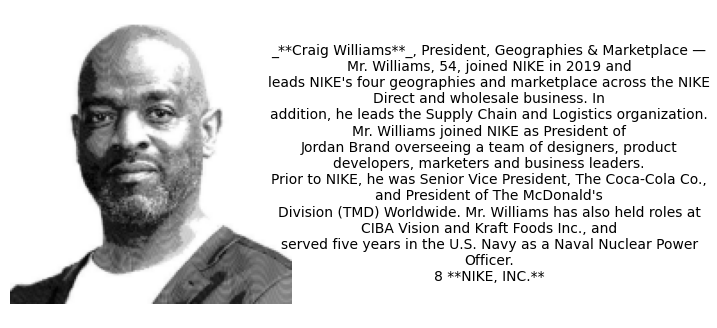

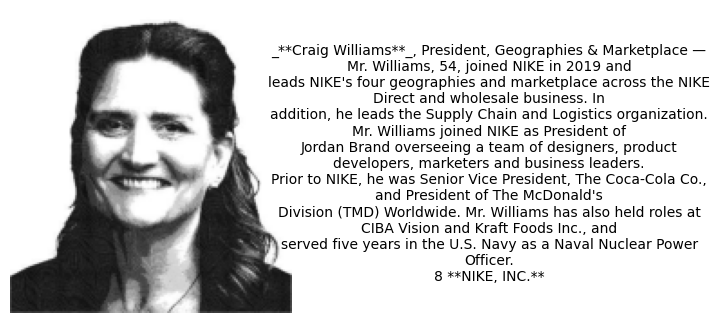

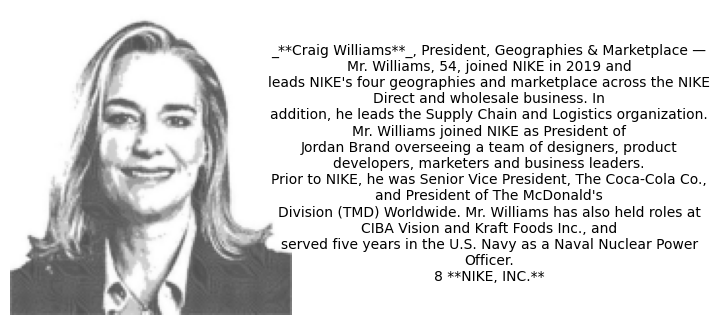

In [82]:
import matplotlib.pyplot as plt
from PIL import Image

for result in results_unmatched:
    img_path = result["image_path"]
    text = result["text_preview"]

    # Carica immagine
    img = Image.open(f"img_out/{img_path}")

    # Crea figura
    plt.figure(figsize=(8, 4))

    # Mostra immagine
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')

    # Mostra testo
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, text, wrap=True, fontsize=10, ha='center', va='center')
    plt.axis('off')

    plt.show()

# Inseriamo sia gli embeddings dei chunks che delle immagini nel vectorstore Qdrant

In [114]:
# per prima cosa dobbiamo creare un wrapper per il nostro motore di embedding jina

from langchain_core.embeddings import Embeddings
from PIL import Image


class JinaEmbeddings(Embeddings):
    def __init__(self, model):
        self.model = model



    # funzione per emebeddare una lista di testi come chunks
    def embed_documents(self, texts):
        return self.model.encode_text(
            texts=texts,
            task="retrieval",
            prompt_name="passage",
            return_numpy=True
        ).tolist()


    # funzione per embeddare una singola quesry di testo
    def embed_query(self, text):
        return self.model.encode_text(
            texts=[text],
            task="retrieval",
            prompt_name="query",
            return_numpy=True
        )[0].tolist()


    # funzione per emebeddare una lista di immagini
    def embed_images(self, image_paths):
        images = [Image.open(path).convert("RGB") for path in image_paths]
        return self.model.encode_image(
            images=images,
            task="retrieval",
            return_numpy=True
        ).tolist()



In [112]:
print(documents[143])

page_content='Upon termination of the $15 billion program, the Company began purchasing shares under a new four-year, $18 billion share
repurchase program authorized by the Board of Directors in June 2022. As of May 31, 2023, the Company had repurchased 43.5
million shares at an average price of $110.38 per share for a total approximate cost of $4.8 billion under the new program.
Repurchases under the Company's new program will be made in open market or privately negotiated transactions in compliance
with the Securities and Exchange Commission Rule 10b-18, subject to market conditions, applicable legal requirements and
other relevant factors. The new share repurchase program does not obligate the Company to acquire any particular amount of
common stock, and it may be suspended at any time at the Company's discretion.
All share repurchases were made under NIKE's publicly announced program, and there are no other programs under which the
Company repurchases shares. The following table pr

In [131]:
# mettiamo gli embedding dei chubnks e delle immagini in qdrant
from qdrant_client import QdrantClient
from langchain_qdrant import QdrantVectorStore
from qdrant_client.http.models import Distance, VectorParams

jina_emb = JinaEmbeddings(model)

# client for local storage
client = QdrantClient(
    url="http://host.docker.internal:6333",  # Assicurati che l'URL sia corretto
    prefer_grpc=False,  # Usa HTTP invece di gRPC
)

client.recreate_collection(
    collection_name="pdf_multimodal",
    vectors_config={
        "text_vector": VectorParams(size=2048, distance=Distance.COSINE),
        "image_vector": VectorParams(size=2048, distance=Distance.COSINE),
    },
)


# facciamo gli embeddings
from PIL import Image
from qdrant_client.models import PointStruct # rappresenta un singolo punto nel database vettoriale

point_id = 0

text_points = []
for chunk in chunks:
    text_emb = jina_emb.embed_documents([chunk["text"]])[0]
    if chunk["metadata"]["images"]:
        for img_path in chunk["metadata"]["images"]:

            text_points.append(PointStruct(
                id=point_id,
                vector={
                    "text_vector": text_emb,
                },
                payload={
                    "page": chunk["metadata"]["page"],
                    "text_preview": chunk["text"][:200],
                    "image_path": image_path
                }
            ))
            point_id += 1
    else:
        text_points.append(PointStruct(
            id=point_id,
            vector={
                "text_vector": text_emb,
                # Nessuna immagine associata
            },
            payload={
                "page": chunk["metadata"]["page"],
                "text_preview": chunk["text"][:200],
                "image_path": None
            }
        ))
        point_id += 1

import os
image_points = []

for img_path in sorted(os.listdir("img_out")):
    full_path = os.path.join("img_out", img_path)
    img_emb = jina_emb.embed_images([full_path])[0]  # solo immagini
    image_points.append(PointStruct(
        id=point_id,
        vector={"image_vector": img_emb},
        payload={"image_path": full_path}
    ))
    point_id += 1

all_points = text_points + image_points

client.upsert(collection_name="pdf_multimodal", points=all_points)
print(f"✅ Inseriti {len(all_points)} multimodal points")

C:\Users\felip\AppData\Local\Temp\ipykernel_4440\1088892888.py:14: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(
Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


✅ Inseriti 437 multimodal points


In [135]:
q_t = jina_emb.embed_query("Chi sono gli executive officers di Nike?")

response = client.query_points(
    collection_name="pdf_multimodal",
    query=q_t,
    using="text_vector",
    limit=5,
    with_payload=True
)


for point in response.points:
    print(f"Page: {point.payload['page']},\nText: {point.payload['text_preview']},\nImage: {point.payload['image_path']},\nSimilarity: {point.score}\n\n")



Encoding texts...: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Page: 12,
Text: #### **INFORMATION ABOUT OUR EXECUTIVE OFFICERS**
The executive officers of NIKE, Inc. as of July 20, 2023, are as follows:
_**Mark G. Parker**_, Executive Chairman — Mr. Parker, 67, is Executive Chai,
Image: None,
Similarity: 0.8226571


Page: 12,
Text: _**Matthew Friend**_, Executive Vice President and Chief Financial Officer — Mr. Friend, 45, joined NIKE in
2009 and leads the Company's finance, demand & supply management, procurement and global pla,
Image: None,
Similarity: 0.7472864


Page: 12,
Text: _**Ann M. Miller**_, Executive Vice President, Chief Legal Officer — Ms. Miller, 49, joined NIKE in 2007 and
serves as EVP, Chief Legal Officer for NIKE, Inc. In her capacity as Chief Legal Officer, s,
Image: None,
Similarity: 0.7471847


Page: 103,
Text: ### **SIGNATURES**
Pursuant to the requirements of Section 13 or 15(d) of the Securities Exchange Act of 1934, the registrant has duly caused this
report to be signed on its behalf by the undersigned,,
Image: None,
Sim

In [136]:
q_i = jina_emb.embed_images(["./img_out/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-34-0.png"])[0]

response = client.query_points(
    collection_name="pdf_multimodal",
    query=q_i,
    using="image_vector",
    limit=5,
    with_payload=True
)

for point in response.points:
    print(f"Image: {point.payload['image_path']},\nSimilarity: {point.score}\n\n")


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

Image: img_out\414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-34-0.png,
Similarity: 1.0


Image: img_out\414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-58-0.png,
Similarity: 0.9202932


Image: img_out\414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-81-2.png,
Similarity: 0.8883697


Image: img_out\414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-37-1.png,
Similarity: 0.83831716


Image: img_out\414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf-32-0.png,
Similarity: 0.7903754


